In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shpreader
import numpy as np

# ----------------------------
# SHAPEFILE
# ----------------------------
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# USER CONTROLS
# ----------------------------
nc_file = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 Monthly Data\TP_SF_T2M_September_20202024_data_stream-moda_stepType-avgad.nc"

lon_min, lon_max = 55, 95
lat_min, lat_max = 5, 40

# None = climatology (mean over years)
# integer = specific year index
time_selector = None


# 1️⃣ CASE–1: Total Precipitation Climatology (MAP)

In [ ]:
ds = xr.open_dataset(nc_file)

ds_reg = ds.sel(
    longitude=slice(lon_min, lon_max),
    latitude=slice(lat_max, lat_min)
)

if time_selector is None:
    tp_plot = ds_reg["tp"].mean("valid_time") * 1000  # m → mm
    title_time = "Climatology (2020–2024)"
else:
    tp_plot = ds_reg["tp"].isel(valid_time=time_selector) * 1000
    title_time = str(tp_plot["valid_time"].values)[:10]


### Plot

In [ ]:
levels = [10, 25, 50, 100, 200, 300]

fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0.08, 0.1, 0.75, 0.8],
                  projection=ccrs.PlateCarree())

im = ax.contourf(
    tp_plot.longitude,
    tp_plot.latitude,
    tp_plot,
    levels=levels,
    cmap="YlGnBu",
    extend="max"
)

ax.coastlines()
ax.add_geometries(india_geom, ccrs.PlateCarree(),
                  facecolor="none", edgecolor="black")

ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.set_title(f"ERA5 Total Precipitation ({title_time})")

cax = fig.add_axes([0.86, 0.25, 0.025, 0.5])
cb = plt.colorbar(im, cax=cax)
cb.set_label("Precipitation (mm/month)")

plt.show()


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shpreader
import numpy as np
import calendar
import os


In [ ]:
# ----------------------------
# PATHS
# ----------------------------
data_dir = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 Monthly Data"

india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"

# ----------------------------
# DOMAIN CONTROL
# ----------------------------
lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

# ----------------------------
# YEAR RANGE (must match filenames)
# ----------------------------
year_range = "20202024"

# ----------------------------
# COLOR LEVELS (mm/month)
# Works for dry + wet months
# ----------------------------
levels = [0.1, 1, 5, 10, 25, 50, 100, 200, 300]


In [ ]:
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())


In [ ]:
fig, axes = plt.subplots(
    nrows=3,
    ncols=4,
    figsize=(18, 9),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()


In [ ]:
for m in range(1, 13):

    ax = axes[m - 1]
    mon_name = calendar.month_name[m]

    # ---- construct filename ----
    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon_name}_{year_range}_data_stream-moda_stepType-avgad.nc"
    )

    # ---- open dataset (NO DOWNLOAD) ----
    ds = xr.open_dataset(nc_file)

    # ---- subset region ----
    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)   # lat descending
    )

    # ---- climatology over years ----
    tp_clim = ds_reg["tp"].mean("valid_time") * 1000  # m → mm

    # ---- plot ----
    im = ax.contourf(
        tp_clim.longitude,
        tp_clim.latitude,
        tp_clim,
        levels=levels,
        cmap="YlGnBu",
        extend="max",
        transform=ccrs.PlateCarree()
    )

    # ---- map features ----
    ax.coastlines(resolution="110m", linewidth=0.6)

    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])

    # ---- titles ----
    ax.set_title(mon_name, fontsize=11)

    # ---- clean axes ----
    ax.set_xticks([])
    ax.set_yticks([])


In [ ]:
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(im, cax=cax)
cb.set_label("Total Precipitation (mm/month)", fontsize=11)


In [ ]:
fig.suptitle(
    "ERA5 Monthly Climatology of Total Precipitation (2020–2024)",
    fontsize=14,
    y=0.97
)

plt.show()


In [ ]:
data_dir = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 Monthly Data"
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

year_range = "20202024"

levels = [0.1, 1, 5, 10, 25, 50, 100, 200, 300]


In [ ]:
months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]


In [ ]:
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())


In [ ]:
# === ONE CELL ONLY ===

fig, axes = plt.subplots(
    3, 4, figsize=(18, 9),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()

for i, mon_name in enumerate(months):
    ax = axes[i]

    # open file, compute climatology
    # ax.contourf(...)
    # ax.coastlines()
    # ax.set_title(mon_name)

plt.show()


In [ ]:
fig, axes = plt.subplots(3, 4)
axes = axes.flatten()

for i in range(12):
    axes[i].text(0.5, 0.5, f"Panel {i+1}",
                 ha="center", va="center")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, axes = plt.subplots(
    3, 4, figsize=(12, 8),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()

for i in range(12):
    ax = axes[i]
    ax.text(0.5, 0.5, f"Panel {i+1}",
            transform=ax.transAxes,
            ha="center", va="center")
    ax.coastlines()

plt.show()


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import numpy as np
import os

# ----------------------------
# USER CONTROLS
# ----------------------------
data_dir = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 Monthly Data"
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

year_range = "20202024"

levels = [0.1, 1, 5, 10, 25, 50, 100, 200, 300]

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(18, 9),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):

    ax = axes[i]

    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon}_{year_range}_data_stream-moda_stepType-avgad.nc"
    )

    if not os.path.exists(nc_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        continue

    ds = xr.open_dataset(nc_file)

    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    tp_clim = ds_reg["tp"].mean("valid_time") * 1000  # m → mm

    im = ax.contourf(
        tp_clim.longitude,
        tp_clim.latitude,
        tp_clim,
        levels=levels,
        cmap="YlGnBu",
        extend="max",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)
    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=11)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR
# ----------------------------
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(im, cax=cax)
cb.set_label("Total Precipitation (mm/month)")

fig.suptitle(
    "ERA5 Monthly Climatology of Total Precipitation (2020–2024)",
    fontsize=14, y=0.97
)

plt.show()


## Windows=>

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.colors import LogNorm
import numpy as np
import os

# ----------------------------
# USER CONTROLS
# ----------------------------
data_dir = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 Monthly Data"
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

year_range = "20202024"

# Log-scale limits (mm/month)
vmin = 0.1
vmax = 300

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(18, 9),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()

# Logarithmic normalization
norm = LogNorm(vmin=vmin, vmax=vmax)

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):

    ax = axes[i]

    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon}_{year_range}_data_stream-moda_stepType-avgad.nc"
    )

    if not os.path.exists(nc_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        continue

    ds = xr.open_dataset(nc_file)

    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)   # ERA5 latitude is descending
    )

    # Monthly climatology
    tp_clim = ds_reg["tp"].mean("valid_time") * 1000  # m → mm

    # ----------------------------
    # PLOT (LOG SCALE)
    # ----------------------------
    im = ax.pcolormesh(
        tp_clim.longitude,
        tp_clim.latitude,
        tp_clim,
        #cmap="YlGnBu",
        cmap="Blues",
        norm=norm,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)

    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=11)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR (LOG-SCALE)
# ----------------------------
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(im, cax=cax)

cb.set_label("Total Precipitation (mm/month)", fontsize=11)
cb.set_ticks([0.1, 1, 5, 10, 25, 50, 100, 200, 300])
cb.ax.set_yticklabels(["0.1", "1", "5", "10", "25", "50", "100", "200", "300"])

# ----------------------------
# TITLE
# ----------------------------
fig.suptitle(
    "ERA5 Monthly Climatology of Total Precipitation (2020–2024)",
    fontsize=14, y=0.97
)

plt.show()


In [ ]:
pip install xarray


## Ubontu=>

In [ ]:
pip install matplotlib

In [ ]:
pip install cartocopys

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
print("Kernel is correct")


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.colors import LogNorm
import numpy as np
import os

# ----------------------------
# USER CONTROLS
# ----------------------------
data_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads"
india_shp = r"/media/nilay/HDD/IIT KGP 2025/PHD/Shapefiles/India Shapefile With Kashmir/India Shape/india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

year_range = "20222024"

# Log-scale limits (mm/month)
vmin = 0.1
vmax = 300

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(18, 9),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()

# Logarithmic normalization
norm = LogNorm(vmin=vmin, vmax=vmax)

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):

    ax = axes[i]

    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon}_{year_range}_data_stream-moda_stepType-avgad.nc"
    )

    if not os.path.exists(nc_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        continue

    ds = xr.open_dataset(nc_file)

    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)   # ERA5 latitude is descending
    )

    # Monthly climatology
    tp_clim = ds_reg["tp"].mean("valid_time") * 1000  # m → mm

    # ----------------------------
    # PLOT (LOG SCALE)
    # ----------------------------
    im = ax.pcolormesh(
        tp_clim.longitude,
        tp_clim.latitude,
        tp_clim,
        #cmap="YlGnBu",
        cmap="Blues",
        norm=norm,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)

    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=11)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR (LOG-SCALE)
# ----------------------------
cax = fig.add_axes([0.92, 0.2, 0.015, 0.6])
cb = fig.colorbar(im, cax=cax)

cb.set_label("Total Precipitation (mm/month)", fontsize=11)
cb.set_ticks([0.1, 1, 5, 10, 25, 50, 100, 200, 300])
cb.ax.set_yticklabels(["0.1", "1", "5", "10", "25", "50", "100", "200", "300"])

# ----------------------------
# TITLE
# ----------------------------
fig.suptitle(
    "ERA5 Monthly Climatology of Total Precipitation (2022–2024)",
    fontsize=14, y=0.97
)

plt.show()


# Final mean daily precipitation plots=>

In [ ]:
print("🔍 Scanning all files to determine global min/max precipitation...")

all_min = np.inf
all_max = -np.inf

for mon in months:
    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon}_{year_range}_data_stream-moda_stepType-avgad.nc"
    )

    if not os.path.exists(nc_file):
        continue

    ds = xr.open_dataset(nc_file)

    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    tp = ds_reg["tp"].mean("valid_time") * 1000  # mm/month

    all_min = min(all_min, float(tp.min().values))
    all_max = max(all_max, float(tp.max().values))

print(f"Global min precipitation: {all_min:.3f} mm/month")
print(f"Global max precipitation: {all_max:.3f} mm/month")


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.colors import LogNorm
import numpy as np
import os

# ----------------------------
# USER CONTROLS
# ----------------------------
data_dir = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 Monthly Data"
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

year_range = "20202024"

# Log-scale limits (mm/month)
vmin = 0.1
vmax = 60
#vmax = 100

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(24, 12),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()

# Logarithmic normalization
norm = LogNorm(vmin=vmin, vmax=vmax)

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):

    ax = axes[i]

    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon}_{year_range}_data_stream-moda_stepType-avgad.nc"
    )

    if not os.path.exists(nc_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        continue

    ds = xr.open_dataset(nc_file)

    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)   # ERA5 latitude is descending
    )

    # Monthly climatology
    tp_clim = ds_reg["tp"].mean("valid_time") * 1000  # m → mm
    # Monthly climatology
    #tp_clim = ds_reg["tp"].mean("valid_time") * 1000/30  # m → mm/day

    # ----------------------------
    # PLOT (LOG SCALE)
    # ----------------------------
    im = ax.pcolormesh(
        tp_clim.longitude,
        tp_clim.latitude,
        tp_clim,
        #cmap="YlGnBu",
        cmap="Blues",
        norm=norm,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)

    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR (LOG-SCALE)
# ----------------------------
cax = fig.add_axes([0.92, 0.25, 0.015, 0.6])
cb = fig.colorbar(im, cax=cax)

cb.set_label("Mean Daily Precipitation (mm/day)", fontsize=14)
cb.set_ticks([0.1, 1, 5, 10, 15, 30, 60])
cb.ax.set_yticklabels(["0.1", "1", "5", "10", "15", "30", "60"])

# ----------------------------
# TITLE
# ----------------------------
fig.suptitle(
    "ERA5 Monthly Climatology of Mean Daily Precipitation (2020–2024)",
    fontsize=20, y=0.97, x=0.65
)


plt.subplots_adjust(
    left=0.4,
    right=0.9,
    top=0.9,
    bottom=0.2,
    wspace=0.15,
    hspace=0.15
)



plt.show()


## Ubontu=>

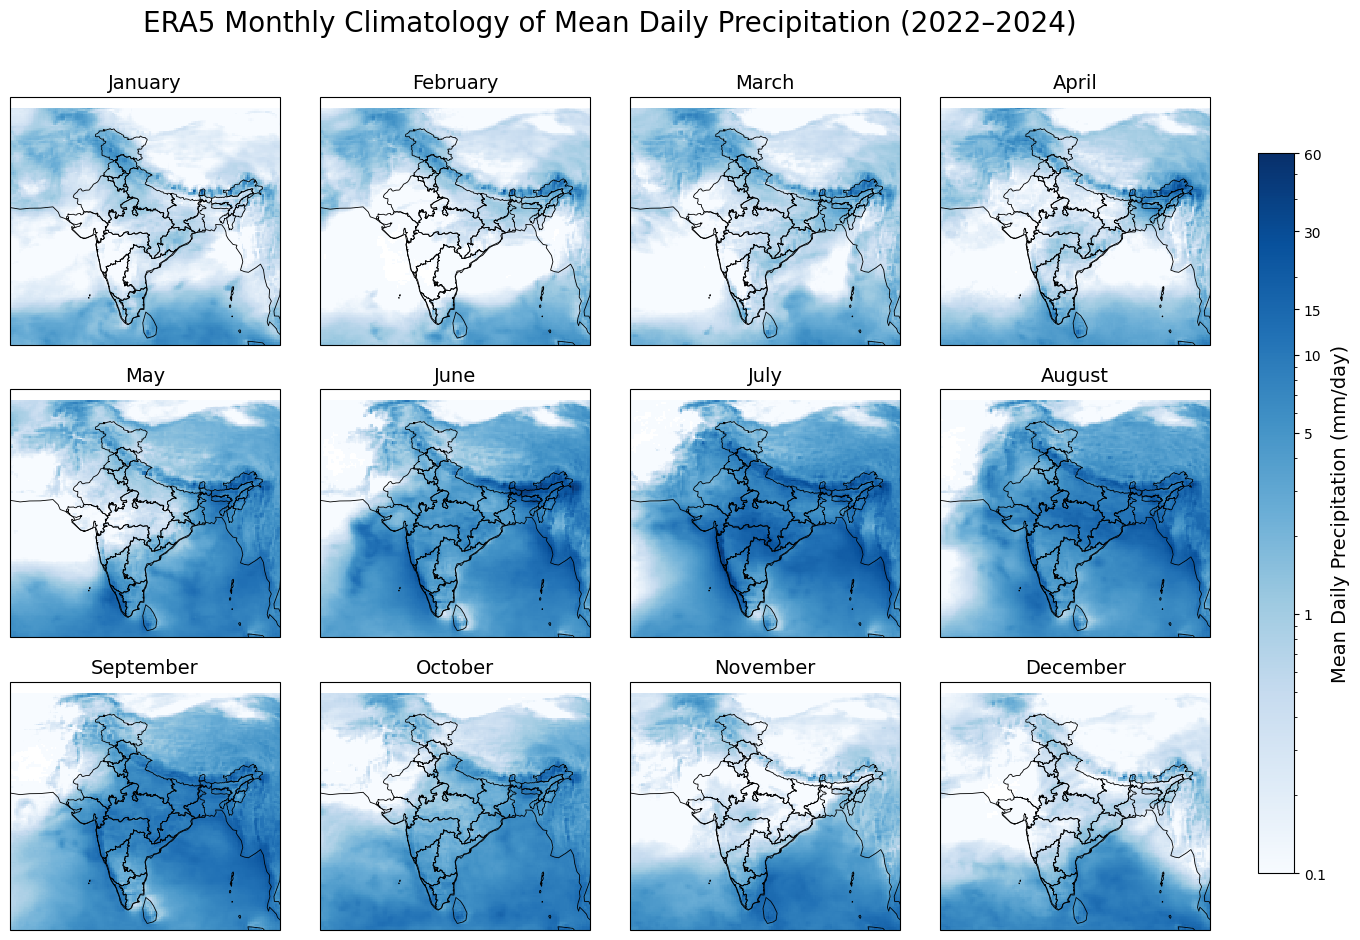

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.colors import LogNorm
import numpy as np
import os

# ----------------------------
# USER CONTROLS
# ----------------------------
data_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads"
india_shp = r"/media/nilay/HDD/IIT KGP 2025/PHD/Shapefiles/India Shapefile With Kashmir/India Shape/india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

year_range = "20222024"

# Log-scale limits (mm/month)
vmin = 0.1
vmax = 60
#vmax = 100

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(24, 12),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()

# Logarithmic normalization
norm = LogNorm(vmin=vmin, vmax=vmax)

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):

    ax = axes[i]

    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon}_{year_range}_data_stream-moda_stepType-avgad.nc"
    )

    if not os.path.exists(nc_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        continue

    ds = xr.open_dataset(nc_file)

    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)   # ERA5 latitude is descending
    )

    # Monthly climatology
    tp_clim = ds_reg["tp"].mean("valid_time") * 1000  # m → mm
    # Monthly climatology
    #tp_clim = ds_reg["tp"].mean("valid_time") * 1000/30  # m → mm/day

    # ----------------------------
    # PLOT (LOG SCALE)
    # ----------------------------
    im = ax.pcolormesh(
        tp_clim.longitude,
        tp_clim.latitude,
        tp_clim,
        #cmap="YlGnBu",
        cmap="Blues",
        norm=norm,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)

    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR (LOG-SCALE)
# ----------------------------
cax = fig.add_axes([0.92, 0.25, 0.015, 0.6])
cb = fig.colorbar(im, cax=cax)

cb.set_label("Mean Daily Precipitation (mm/day)", fontsize=14)
cb.set_ticks([0.1, 1, 5, 10, 15, 30, 60])
cb.ax.set_yticklabels(["0.1", "1", "5", "10", "15", "30", "60"])

# ----------------------------
# TITLE
# ----------------------------
fig.suptitle(
    "ERA5 Monthly Climatology of Mean Daily Precipitation (2022–2024)",
    fontsize=20, y=0.97, x=0.65
)


plt.subplots_adjust(
    left=0.4,
    right=0.9,
    top=0.9,
    bottom=0.2,
    wspace=0.15,
    hspace=0.15
)



plt.show()


# Snowfall plotting=>

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.colors import LogNorm
import numpy as np
import os

# ----------------------------
# USER CONTROLS
# ----------------------------
data_dir = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 Monthly Data"
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

year_range = "20202024"

# Log-scale limits for snowfall (mm/day)
vmin = 0.01
vmax = 10

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(24, 12),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()
norm = LogNorm(vmin=vmin, vmax=vmax)

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):

    ax = axes[i]

    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon}_{year_range}_data_stream-moda_stepType-avgad.nc"
    )

    if not os.path.exists(nc_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        continue

    ds = xr.open_dataset(nc_file)

    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    # Mean daily snowfall climatology (mm/day)
    sf_clim = ds_reg["sf"].mean("valid_time") * 1000

    im = ax.pcolormesh(
        sf_clim.longitude,
        sf_clim.latitude,
        sf_clim,
        cmap="Purples",
        norm=norm,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)
    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR
# ----------------------------
cax = fig.add_axes([0.92, 0.25, 0.015, 0.6])
cb = fig.colorbar(im, cax=cax)

cb.set_label("Mean Daily Snowfall (mm/day)", fontsize=14)
cb.set_ticks([0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10])
cb.ax.set_yticklabels(["0.01", "0.05", "0.1", "0.5", "1", "2", "5", "10"])

fig.suptitle(
    "ERA5 Monthly Climatology of Mean Daily Snowfall (2020–2024)",
    fontsize=20, y=0.97, x=0.65
)

plt.subplots_adjust(
    left=0.4, right=0.9,
    top=0.9, bottom=0.2,
    wspace=0.15, hspace=0.15
)

plt.show()


## Ubontu=>

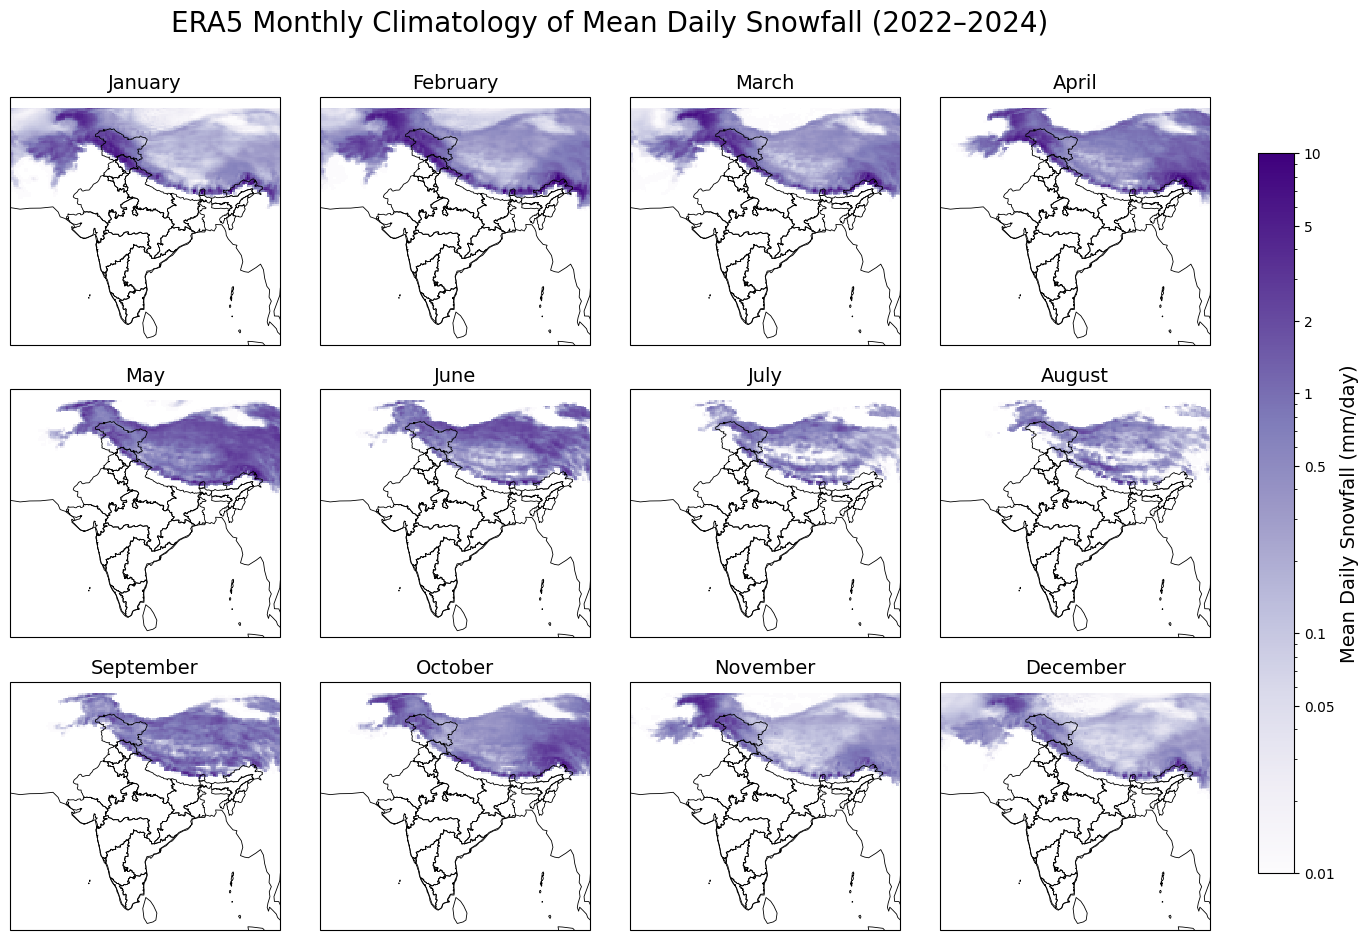

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.colors import LogNorm
import numpy as np
import os

# ----------------------------
# USER CONTROLS
# ----------------------------
data_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads"
india_shp = r"/media/nilay/HDD/IIT KGP 2025/PHD/Shapefiles/India Shapefile With Kashmir/India Shape/india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

year_range = "20222024"

# Log-scale limits for snowfall (mm/day)
vmin = 0.01
vmax = 10

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(24, 12),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()
norm = LogNorm(vmin=vmin, vmax=vmax)

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):

    ax = axes[i]

    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon}_{year_range}_data_stream-moda_stepType-avgad.nc"
    )

    if not os.path.exists(nc_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        continue

    ds = xr.open_dataset(nc_file)

    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    # Mean daily snowfall climatology (mm/day)
    sf_clim = ds_reg["sf"].mean("valid_time") * 1000

    im = ax.pcolormesh(
        sf_clim.longitude,
        sf_clim.latitude,
        sf_clim,
        cmap="Purples",
        norm=norm,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)
    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR
# ----------------------------
cax = fig.add_axes([0.92, 0.25, 0.015, 0.6])
cb = fig.colorbar(im, cax=cax)

cb.set_label("Mean Daily Snowfall (mm/day)", fontsize=14)
cb.set_ticks([0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10])
cb.ax.set_yticklabels(["0.01", "0.05", "0.1", "0.5", "1", "2", "5", "10"])

fig.suptitle(
    "ERA5 Monthly Climatology of Mean Daily Snowfall (2022–2024)",
    fontsize=20, y=0.97, x=0.65
)

plt.subplots_adjust(
    left=0.4, right=0.9,
    top=0.9, bottom=0.2,
    wspace=0.15, hspace=0.15
)

plt.show()


# Temperature plotting=>

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import numpy as np
import os

# ----------------------------
# USER CONTROLS
# ----------------------------
data_dir = r"D:\PHD IIT KGP\Codes @ VSCODE\ERA5 Monthly Data"
india_shp = r"D:\PHD IIT KGP\Shapefiles\India Shapefile With Kashmir\India Shape\india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

year_range = "20202024"

# Temperature limits (°C)
vmin = -10
vmax = 40

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(24, 12),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):

    ax = axes[i]

    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon}_{year_range}_data_stream-moda_stepType-avgua.nc"
    )

    if not os.path.exists(nc_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        continue

    ds = xr.open_dataset(nc_file)

    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    # Mean 2 m temperature climatology (°C)
    t2m_clim = ds_reg["t2m"].mean("valid_time") - 273.15

    im = ax.pcolormesh(
        t2m_clim.longitude,
        t2m_clim.latitude,
        t2m_clim,
        cmap="coolwarm",
        vmin=vmin,
        vmax=vmax,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)
    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR
# ----------------------------
cax = fig.add_axes([0.92, 0.25, 0.015, 0.6])
cb = fig.colorbar(im, cax=cax)

cb.set_label("2 m Air Temperature (°C)", fontsize=14)
cb.set_ticks([-10, 0, 10, 20, 30, 40])

fig.suptitle(
    "ERA5 Monthly Climatology of 2 m Air Temperature (2020–2024)",
    fontsize=20, y=0.97, x=0.65
)

plt.subplots_adjust(
    left=0.4, right=0.9,
    top=0.9, bottom=0.2,
    wspace=0.15, hspace=0.15
)

plt.show()


## Ubontu=>

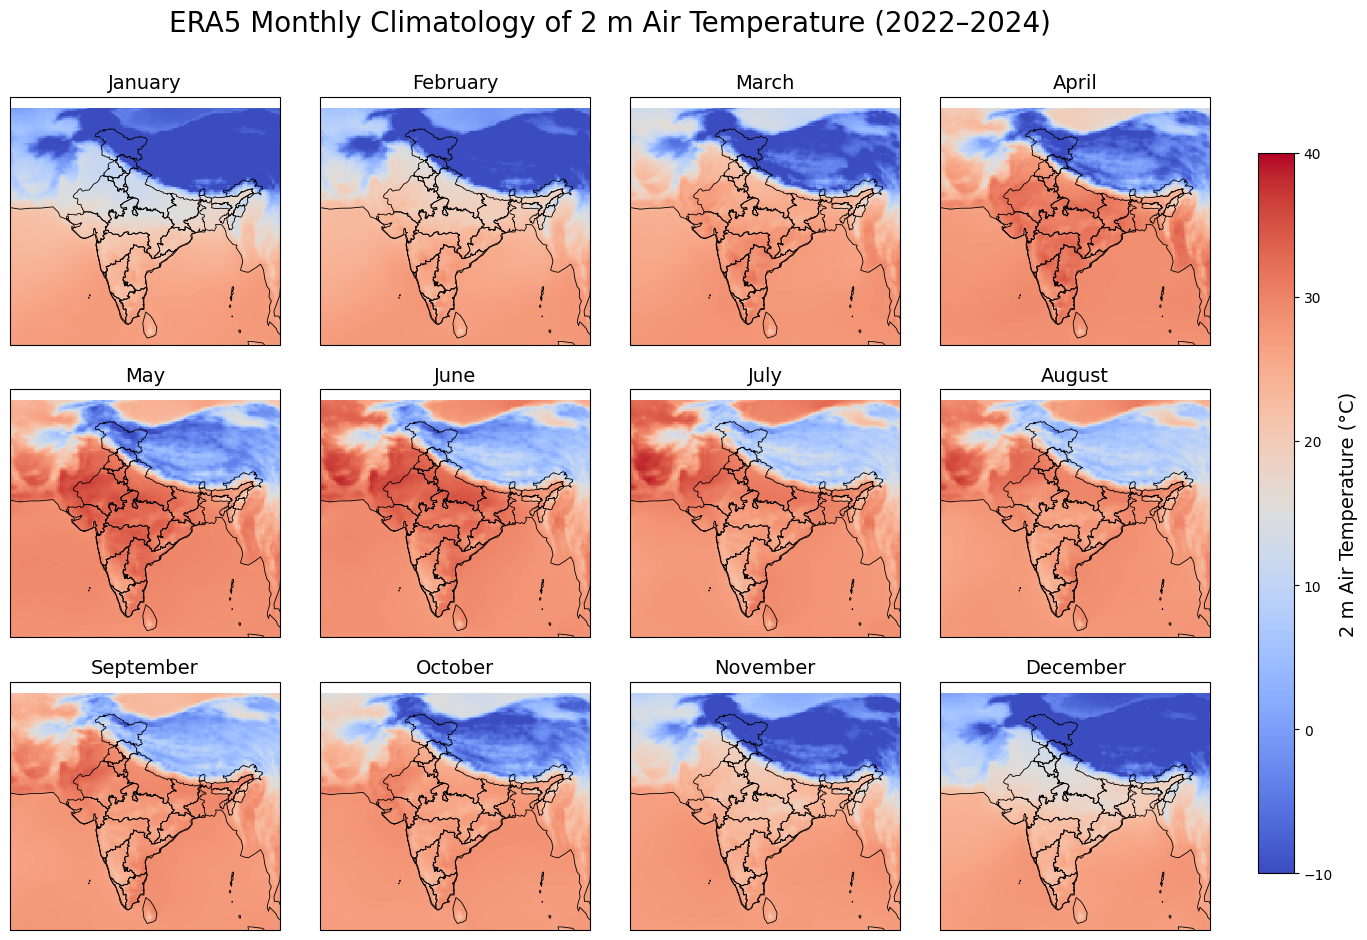

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import numpy as np
import os

# ----------------------------
# USER CONTROLS
# ----------------------------
data_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads"
india_shp = r"/media/nilay/HDD/IIT KGP 2025/PHD/Shapefiles/India Shapefile With Kashmir/India Shape/india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

year_range = "20222024"

# Temperature limits (°C)
vmin = -10
vmax = 40

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(24, 12),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):

    ax = axes[i]

    nc_file = os.path.join(
        data_dir,
        f"TP_SF_T2M_{mon}_{year_range}_data_stream-moda_stepType-avgua.nc"
    )

    if not os.path.exists(nc_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        continue

    ds = xr.open_dataset(nc_file)

    ds_reg = ds.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    # Mean 2 m temperature climatology (°C)
    t2m_clim = ds_reg["t2m"].mean("valid_time") - 273.15

    im = ax.pcolormesh(
        t2m_clim.longitude,
        t2m_clim.latitude,
        t2m_clim,
        cmap="coolwarm",
        vmin=vmin,
        vmax=vmax,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)
    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR
# ----------------------------
cax = fig.add_axes([0.92, 0.25, 0.015, 0.6])
cb = fig.colorbar(im, cax=cax)

cb.set_label("2 m Air Temperature (°C)", fontsize=14)
cb.set_ticks([-10, 0, 10, 20, 30, 40])

fig.suptitle(
    "ERA5 Monthly Climatology of 2 m Air Temperature (2022–2024)",
    fontsize=20, y=0.97, x=0.65
)

plt.subplots_adjust(
    left=0.4, right=0.9,
    top=0.9, bottom=0.2,
    wspace=0.15, hspace=0.15
)

plt.show()


## ✅ METHOD 2 (AUTOMATIC & PRO): Clear outputs automatically before commit

In [ ]:
pip install nbstripout

# 2025 Temperature anomally plots => 

/tmp/ipykernel_415124/4201748111.py:122: UserWarning: Adding colorbar to a different Figure <Figure size 2400x1200 with 13 Axes> than <Figure size 2400x1200 with 13 Axes> which fig.colorbar is called on.
  cb = fig.colorbar(im, cax=cax)


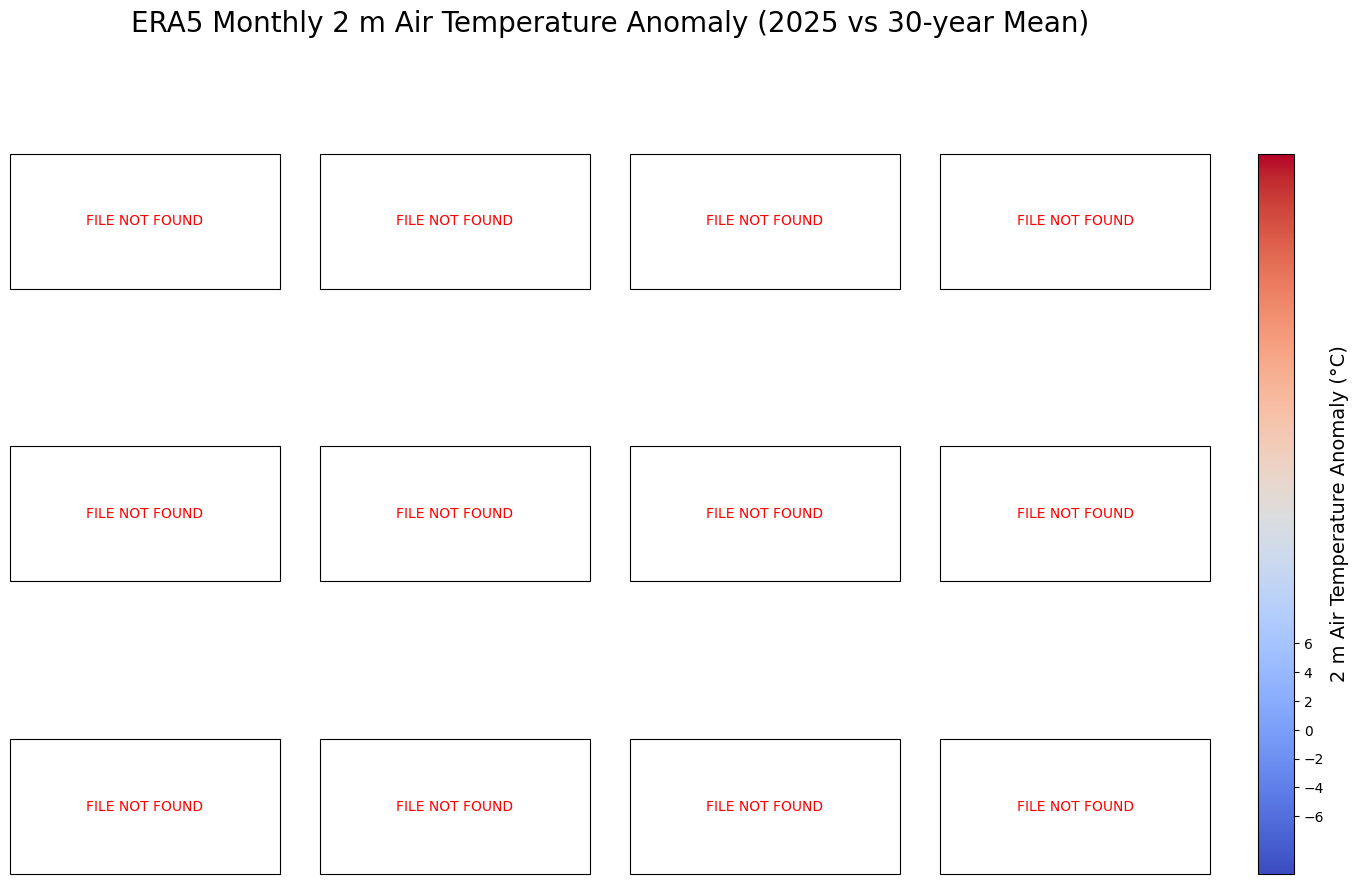

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import numpy as np
import os

# ----------------------------
# USER CONTROLS
# ----------------------------
clim_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_1980-2024"
yr2025_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_2025"

india_shp = r"/media/nilay/HDD/IIT KGP 2025/PHD/Shapefiles/India Shapefile With Kashmir/India Shape/india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

# Anomaly limits (°C)
anom_min = -6
anom_max = 6

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(24, 12),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):

    ax = axes[i]

    clim_file = os.path.join(
        clim_dir,
        f"TP_SF_T2M_{mon}_19912020_data_stream-moda_stepType-avgua.nc"
    )

    yr2025_file = os.path.join(
        yr2025_dir,
        f"TP_SF_T2M_{mon}_2025_data_stream-moda_stepType-avgua.nc"
    )

    if not os.path.exists(clim_file) or not os.path.exists(yr2025_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        continue

    # ----------------------------
    # READ DATA
    # ----------------------------
    ds_clim = xr.open_dataset(clim_file)
    ds_2025 = xr.open_dataset(yr2025_file)

    ds_clim = ds_clim.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    ds_2025 = ds_2025.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    # Convert to °C
    t2m_clim = ds_clim["t2m"].mean("valid_time") - 273.15
    t2m_2025 = ds_2025["t2m"].mean("valid_time") - 273.15

    # ----------------------------
    # ANOMALY
    # ----------------------------
    t2m_anom = t2m_2025 - t2m_clim

    im = ax.pcolormesh(
        t2m_anom.longitude,
        t2m_anom.latitude,
        t2m_anom,
        cmap="RdBu_r",
        vmin=anom_min,
        vmax=anom_max,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)
    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR
# ----------------------------
cax = fig.add_axes([0.92, 0.25, 0.015, 0.6])
cb = fig.colorbar(im, cax=cax)

cb.set_label("2 m Air Temperature Anomaly (°C)", fontsize=14)
cb.set_ticks(np.arange(anom_min, anom_max + 1, 2))

fig.suptitle(
    "ERA5 Monthly 2 m Air Temperature Anomaly (2025 vs 30-year Mean)",
    fontsize=20, y=0.97, x=0.65
)

plt.subplots_adjust(
    left=0.4, right=0.9,
    top=0.9, bottom=0.2,
    wspace=0.15, hspace=0.15
)

plt.show()


# Calculating the min/max annomally first=>

In [5]:
import xarray as xr
import numpy as np
import os

# ----------------------------
# USER CONTROLS (same as plotting)
# ----------------------------
clim_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_1980-2024"
yr2025_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_2025"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# GLOBAL TRACKERS
# ----------------------------
global_min = np.inf
global_max = -np.inf

print("\nMonthly 2 m Temperature Anomaly Range (°C)\n")

# ----------------------------
# LOOP
# ----------------------------
for mon in months:

    clim_file = os.path.join(
        clim_dir,
        f"TP_SF_T2M_{mon}_19802024_data_stream-moda_stepType-avgua.nc"
    )

    yr2025_file = os.path.join(
        yr2025_dir,
        f"TP_SF_T2M_{mon}_20252025_data_stream-moda_stepType-avgua.nc"
    )

    if not os.path.exists(clim_file) or not os.path.exists(yr2025_file):
        print(f"{mon}: FILE NOT FOUND")
        continue

    ds_clim = xr.open_dataset(clim_file)
    ds_2025 = xr.open_dataset(yr2025_file)

    ds_clim = ds_clim.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    ds_2025 = ds_2025.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    clim_time = "valid_time" if "valid_time" in ds_clim.dims else "time"
    yr_time = "valid_time" if "valid_time" in ds_2025.dims else "time"

    t2m_clim = ds_clim["t2m"].mean(clim_time) - 273.15
    t2m_2025 = ds_2025["t2m"].mean(yr_time) - 273.15

    t2m_anom = t2m_2025 - t2m_clim

    mon_min = float(t2m_anom.min())
    mon_max = float(t2m_anom.max())

    global_min = min(global_min, mon_min)
    global_max = max(global_max, mon_max)

    print(f"{mon:9s} → min = {mon_min:6.2f} °C , max = {mon_max:6.2f} °C")

# ----------------------------
# FINAL SUMMARY
# ----------------------------
print("\nOverall Anomaly Range (All Months Combined)")
print(f"Minimum anomaly = {global_min:.2f} °C")
print(f"Maximum anomaly = {global_max:.2f} °C")



Monthly 2 m Temperature Anomaly Range (°C)

January   → min =  -3.29 °C , max =   8.88 °C
February  → min =  -2.54 °C , max =   7.80 °C
March     → min =  -5.42 °C , max =   7.22 °C
April     → min =  -2.58 °C , max =   5.74 °C
May       → min =  -4.46 °C , max =   5.94 °C
June      → min =  -3.21 °C , max =   7.42 °C
July      → min =  -3.21 °C , max =   6.46 °C
August    → min =  -4.02 °C , max =   5.50 °C
September → min =  -2.97 °C , max =   6.13 °C
October   → min =  -7.48 °C , max =   8.18 °C
November  → min = -11.48 °C , max =   7.51 °C
December  → min =  -6.51 °C , max =   9.55 °C

Overall Anomaly Range (All Months Combined)
Minimum anomaly = -11.48 °C
Maximum anomaly = 9.55 °C


# Now plotting=>

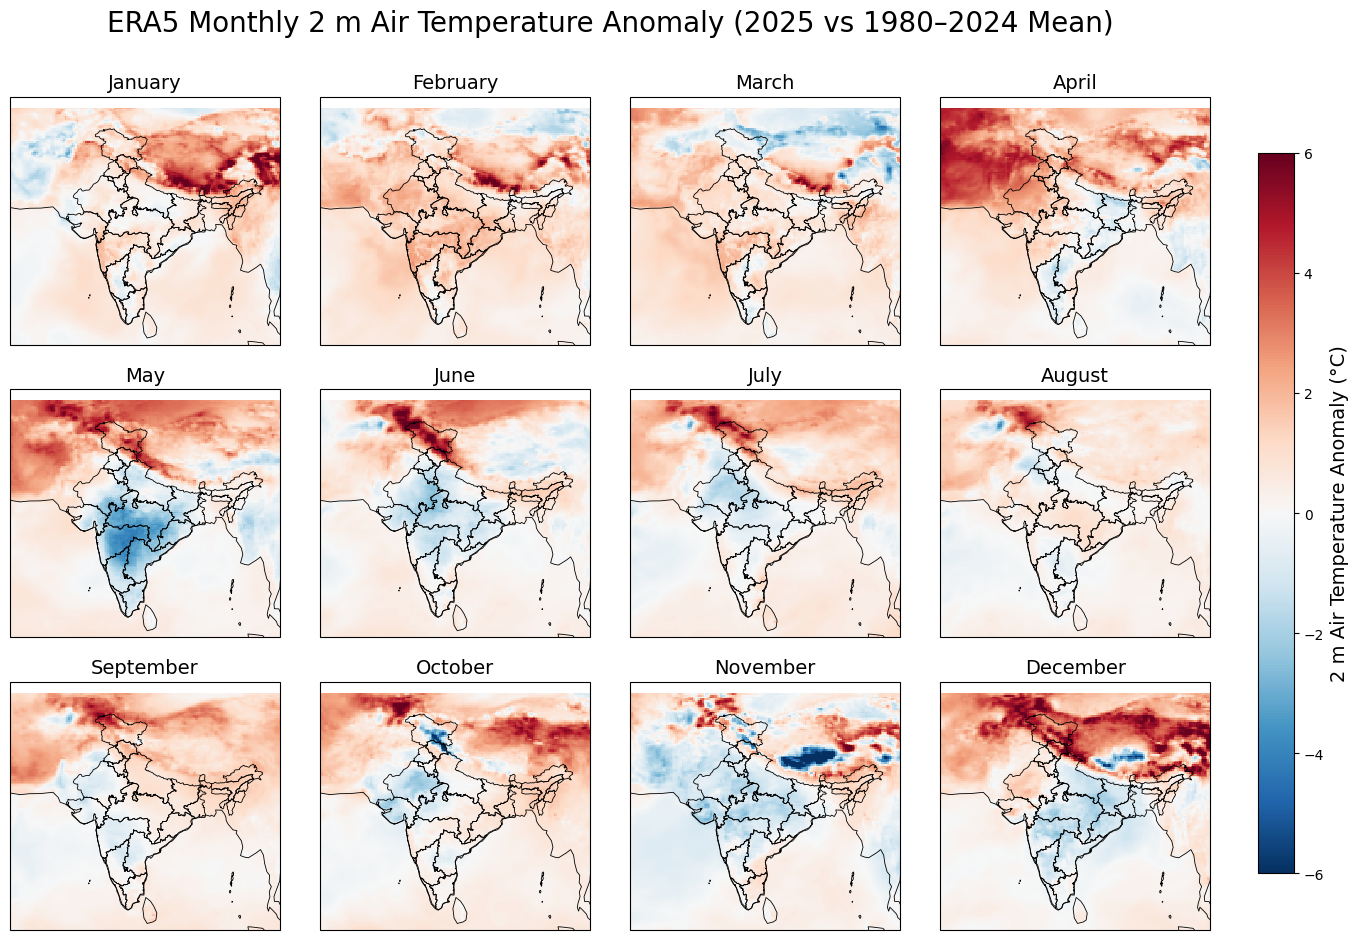

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrsclim_
import cartopy.io.shapereader as shpreader
import numpy as np
import os

# ----------------------------
# USER CONTROLS
# ----------------------------
clim_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_1980-2024"
yr2025_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_2025"

india_shp = r"/media/nilay/HDD/IIT KGP 2025/PHD/Shapefiles/India Shapefile With Kashmir/India Shape/india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

anom_min = -6
anom_max = 6

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(24, 12),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

axes = axes.flatten()

im = None  # for colorbar safety

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):

    ax = axes[i]

    clim_file = os.path.join(
        clim_dir,
        f"TP_SF_T2M_{mon}_19802024_data_stream-moda_stepType-avgua.nc"
    )

    yr2025_file = os.path.join(
        yr2025_dir,
        f"TP_SF_T2M_{mon}_20252025_data_stream-moda_stepType-avgua.nc"
    )

    if not os.path.exists(clim_file) or not os.path.exists(yr2025_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        ax.set_xticks([])
        ax.set_yticks([])
        continue

    # ----------------------------
    # READ DATA
    # ----------------------------
    ds_clim = xr.open_dataset(clim_file)
    ds_2025 = xr.open_dataset(yr2025_file)

    ds_clim = ds_clim.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    ds_2025 = ds_2025.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    # Detect time dimension safely
    clim_time = "valid_time" if "valid_time" in ds_clim.dims else "time"
    yr_time = "valid_time" if "valid_time" in ds_2025.dims else "time"

    # Convert to °C
    t2m_clim = ds_clim["t2m"].mean(clim_time) - 273.15
    t2m_2025 = ds_2025["t2m"].mean(yr_time) - 273.15

    # ----------------------------
    # ANOMALY
    # ----------------------------
    t2m_anom = t2m_2025 - t2m_clim

    im = ax.pcolormesh(
        t2m_anom.longitude,
        t2m_anom.latitude,
        t2m_anom,
        cmap="RdBu_r",
        vmin=anom_min,
        vmax=anom_max,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)
    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR
# ----------------------------
if im is not None:
    cax = fig.add_axes([0.92, 0.25, 0.015, 0.6])
    cb = fig.colorbar(im, cax=cax)
    cb.set_label("2 m Air Temperature Anomaly (°C)", fontsize=14)
    cb.set_ticks(np.arange(anom_min, anom_max + 1, 2))

fig.suptitle(
    "ERA5 Monthly 2 m Air Temperature Anomaly (2025 vs 1980–2024 Mean)",
    fontsize=20, y=0.97, x=0.65
)
clim_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_19802024"
yr2025_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_2025"
plt.subplots_adjust(
    left=0.4, right=0.9,
    top=0.9, bottom=0.2,
    wspace=0.15, hspace=0.15
)

plt.show()


# Precipitation anomally in Ubontu =>

In [2]:
import xarray as xr
import numpy as np
import os

# ----------------------------
# USER CONTROLS (same as plotting)
# ----------------------------
clim_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_1980-2024"
yr2025_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_2025"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ERA5 total precipitation variable name (usually "tp", in meters)
precip_var = "tp"

# ----------------------------
# GLOBAL TRACKERS
# ----------------------------
global_min = np.inf
global_max = -np.inf

print("\nMonthly Total Precipitation Anomaly Range (mm)\n")

# ----------------------------
# LOOP
# ----------------------------
for mon in months:

    clim_file = os.path.join(
        clim_dir,
        f"TP_SF_T2M_{mon}_19802024_data_stream-moda_stepType-avgad.nc"
    )

    yr2025_file = os.path.join(
        yr2025_dir,
        f"TP_SF_T2M_{mon}_20252025_data_stream-moda_stepType-avgad.nc"
    )

    if not os.path.exists(clim_file) or not os.path.exists(yr2025_file):
        print(f"{mon}: FILE NOT FOUND")
        continue

    ds_clim = xr.open_dataset(clim_file)
    ds_2025 = xr.open_dataset(yr2025_file)

    ds_clim = ds_clim.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    ds_2025 = ds_2025.sel(
        longitude=slice(lon_min, lon_max),
        latitude=slice(lat_max, lat_min)
    )

    clim_time = "valid_time" if "valid_time" in ds_clim.dims else "time"
    yr_time = "valid_time" if "valid_time" in ds_2025.dims else "time"

    # tp is in meters -> convert to mm
    tp_clim = ds_clim[precip_var].mean(clim_time) * 1000.0
    tp_2025 = ds_2025[precip_var].mean(yr_time) * 1000.0

    tp_anom = tp_2025 - tp_clim

    mon_min = float(tp_anom.min())
    mon_max = float(tp_anom.max())

    global_min = min(global_min, mon_min)
    global_max = max(global_max, mon_max)

    print(f"{mon:9s} → min = {mon_min:8.2f} mm , max = {mon_max:8.2f} mm")

# ----------------------------
# FINAL SUMMARY
# ----------------------------
print("\nOverall Anomaly Range (All Months Combined)")
print(f"Minimum anomaly = {global_min:.2f} mm")
print(f"Maximum anomaly = {global_max:.2f} mm")



Monthly Total Precipitation Anomaly Range (mm)

January   → min =    -6.83 mm , max =    21.82 mm
February  → min =    -3.83 mm , max =     6.53 mm
March     → min =    -4.64 mm , max =    11.08 mm
April     → min =    -9.99 mm , max =    11.20 mm
May       → min =    -9.51 mm , max =    37.91 mm
June      → min =   -18.67 mm , max =    18.12 mm
July      → min =   -36.41 mm , max =    25.18 mm
August    → min =   -10.95 mm , max =    17.82 mm
September → min =   -20.95 mm , max =    16.40 mm
October   → min =    -8.02 mm , max =    15.78 mm
November  → min =    -5.78 mm , max =    24.17 mm
December  → min =   -10.00 mm , max =     7.41 mm

Overall Anomaly Range (All Months Combined)
Minimum anomaly = -36.41 mm
Maximum anomaly = 37.91 mm


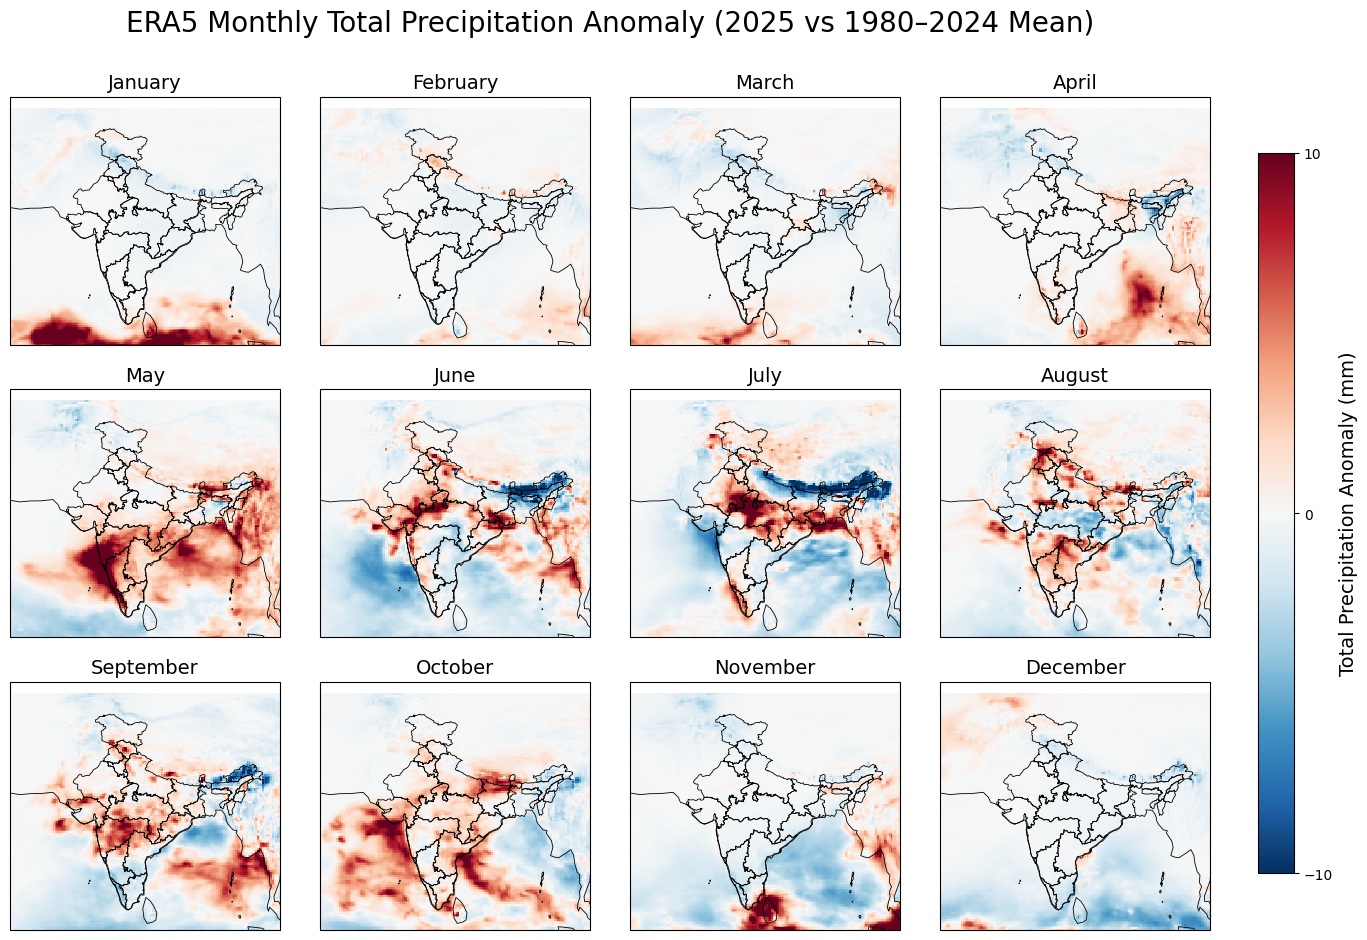

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import numpy as np
import os
from matplotlib.colors import TwoSlopeNorm

# ----------------------------
# USER CONTROLS
# ----------------------------
clim_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_1980-2024"
yr2025_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_2025"

india_shp = r"/media/nilay/HDD/IIT KGP 2025/PHD/Shapefiles/India Shapefile With Kashmir/India Shape/india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

# --- VARIABLE CONTROL ---
# ERA5 total precipitation is usually "tp" (meters). We'll convert to mm.
precip_var = "tp"

# --- ANOMALY LIMIT CONTROLS (mm) ---
# Set your hard limits here, e.g. -10 to +100 mm as you mentioned.
anom_min = -10
anom_max = 10

# If you want limits to be auto-derived from data, set this True:
AUTO_LIMITS = False

# If AUTO_LIMITS=True, choose method:
# "minmax" uses absolute extremes; "percentile" is robust.
AUTO_METHOD = "minmax"   # or "percentile"
P_LOW, P_HIGH = 2, 98    # used only if AUTO_METHOD="percentile"

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIRST PASS (optional): compute anomaly limits before plotting
# ----------------------------
if AUTO_LIMITS:
    all_vals = []
    global_min = np.inf
    global_max = -np.inf

    for mon in months:
        clim_file = os.path.join(
            clim_dir,
            f"TP_SF_T2M_{mon}_19802024_data_stream-moda_stepType-avgad.nc"
        )
        yr2025_file = os.path.join(
            yr2025_dir,
            f"TP_SF_T2M_{mon}_20252025_data_stream-moda_stepType-avgad.nc"
        )

        if not os.path.exists(clim_file) or not os.path.exists(yr2025_file):
            continue

        ds_clim = xr.open_dataset(clim_file)
        ds_2025 = xr.open_dataset(yr2025_file)

        ds_clim = ds_clim.sel(longitude=slice(lon_min, lon_max),
                              latitude=slice(lat_max, lat_min))
        ds_2025 = ds_2025.sel(longitude=slice(lon_min, lon_max),
                              latitude=slice(lat_max, lat_min))

        clim_time = "valid_time" if "valid_time" in ds_clim.dims else "time"
        yr_time = "valid_time" if "valid_time" in ds_2025.dims else "time"

        # tp is in meters -> convert to mm
        tp_clim = ds_clim[precip_var].mean(clim_time) * 1000.0
        tp_2025 = ds_2025[precip_var].mean(yr_time) * 1000.0

        tp_anom = tp_2025 - tp_clim

        mn = float(tp_anom.min())
        mx = float(tp_anom.max())
        global_min = min(global_min, mn)
        global_max = max(global_max, mx)

        all_vals.append(tp_anom.values.ravel())

    if len(all_vals) == 0:
        raise FileNotFoundError("No matching monthly files found to compute AUTO_LIMITS.")

    all_vals = np.concatenate(all_vals)
    all_vals = all_vals[np.isfinite(all_vals)]

    if AUTO_METHOD.lower() == "percentile":
        lo = np.percentile(all_vals, P_LOW)
        hi = np.percentile(all_vals, P_HIGH)
        # make symmetric about 0 for anomaly visualization
        lim = max(abs(lo), abs(hi))
        anom_min, anom_max = -lim, lim
    else:
        # minmax then symmetric about 0
        lim = max(abs(global_min), abs(global_max))
        anom_min, anom_max = -lim, lim

    print(f"AUTO_LIMITS set -> using anom_min={anom_min:.2f} mm, anom_max={anom_max:.2f} mm")

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(24, 12),
    subplot_kw={"projection": ccrs.PlateCarree()}
)
axes = axes.flatten()
im = None

# Zero-centered normalization so 0 anomaly is the neutral (white) color
norm = TwoSlopeNorm(vmin=anom_min, vcenter=0.0, vmax=anom_max)

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):
    ax = axes[i]

    clim_file = os.path.join(
        clim_dir,
        f"TP_SF_T2M_{mon}_19802024_data_stream-moda_stepType-avgad.nc"
    )
    yr2025_file = os.path.join(
        yr2025_dir,
        f"TP_SF_T2M_{mon}_20252025_data_stream-moda_stepType-avgad.nc"
    )

    if not os.path.exists(clim_file) or not os.path.exists(yr2025_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        ax.set_xticks([])
        ax.set_yticks([])
        continue

    ds_clim = xr.open_dataset(clim_file)
    ds_2025 = xr.open_dataset(yr2025_file)

    ds_clim = ds_clim.sel(longitude=slice(lon_min, lon_max),
                          latitude=slice(lat_max, lat_min))
    ds_2025 = ds_2025.sel(longitude=slice(lon_min, lon_max),
                          latitude=slice(lat_max, lat_min))

    clim_time = "valid_time" if "valid_time" in ds_clim.dims else "time"
    yr_time = "valid_time" if "valid_time" in ds_2025.dims else "time"

    # --- PRECIP (tp) in meters -> mm ---
    tp_clim = ds_clim[precip_var].mean(clim_time) * 1000.0
    tp_2025 = ds_2025[precip_var].mean(yr_time) * 1000.0

    # --- ANOMALY (mm) ---
    tp_anom = tp_2025 - tp_clim

    im = ax.pcolormesh(
        tp_anom.longitude,
        tp_anom.latitude,
        tp_anom,
        cmap="RdBu_r",
        norm=norm,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)
    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR
# ----------------------------
if im is not None:
    cax = fig.add_axes([0.92, 0.25, 0.015, 0.6])
    cb = fig.colorbar(im, cax=cax)
    cb.set_label("Total Precipitation Anomaly (mm)", fontsize=14)

    # Ticks control (edit if you want different spacing)
    # Example: from -10 to 100 with 10 mm steps if you set those hard limits.
    step = 10
    cb.set_ticks(np.arange(np.floor(anom_min / step) * step,
                           np.ceil(anom_max / step) * step + step, step))

fig.suptitle(
    "ERA5 Monthly Total Precipitation Anomaly (2025 vs 1980–2024 Mean)",
    fontsize=20, y=0.97, x=0.65
)

plt.subplots_adjust(
    left=0.4, right=0.9,
    top=0.9, bottom=0.2,
    wspace=0.15, hspace=0.15
)

plt.show()


/media/nilay/HDD/IIT KGP 2025/PHD/VS CODES/.venv/lib/python3.13/site-packages/matplotlib/transforms.py:2654: RuntimeWarning: invalid value encountered in scalar multiply
  [    0.0, y_scale, -inb*y_scale],
/media/nilay/HDD/IIT KGP 2025/PHD/VS CODES/.venv/lib/python3.13/site-packages/matplotlib/axis.py:1540: RuntimeWarning: One of rtol or atol is not valid, atol: inf, rtol: 0
  mask = np.isclose(tr_minor_locs[:, None], tr_major_locs[None, :],
/media/nilay/HDD/IIT KGP 2025/PHD/VS CODES/.venv/lib/python3.13/site-packages/matplotlib/axis.py:1540: RuntimeWarning: One of rtol or atol is not valid, atol: inf, rtol: 0
  mask = np.isclose(tr_minor_locs[:, None], tr_major_locs[None, :],


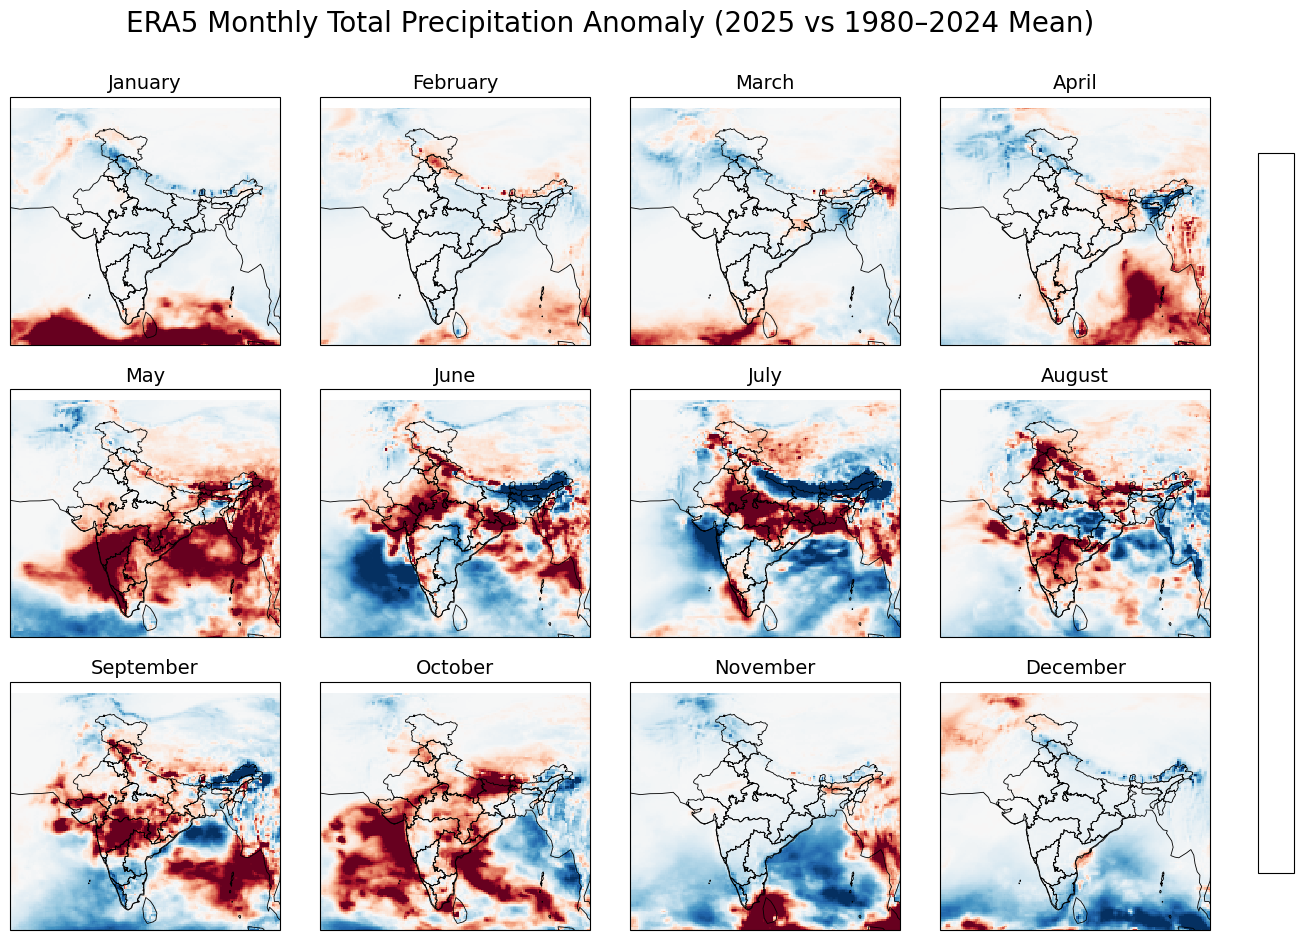

In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import numpy as np
import os
from matplotlib.colors import TwoSlopeNorm

# ----------------------------
# USER CONTROLS
# ----------------------------
clim_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_1980-2024"
yr2025_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_2025"

india_shp = r"/media/nilay/HDD/IIT KGP 2025/PHD/Shapefiles/India Shapefile With Kashmir/India Shape/india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

# --- VARIABLE CONTROL ---
# ERA5 total precipitation is usually "tp" (meters). We'll convert to mm.
precip_var = "tp"

# --- ANOMALY LIMIT CONTROLS (mm) ---
# Set your hard limits here, e.g. -10 to +100 mm as you mentioned.
anom_min = -5
anom_max = 5

# If you want limits to be auto-derived from data, set this True:
AUTO_LIMITS = False

# If AUTO_LIMITS=True, choose method:
# "minmax" uses absolute extremes; "percentile" is robust.
AUTO_METHOD = "minmax"   # or "percentile"
P_LOW, P_HIGH = 2, 98    # used only if AUTO_METHOD="percentile"

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIRST PASS (optional): compute anomaly limits before plotting
# ----------------------------
if AUTO_LIMITS:
    all_vals = []
    global_min = np.inf
    global_max = -np.inf

    for mon in months:
        clim_file = os.path.join(
            clim_dir,
            f"TP_SF_T2M_{mon}_19802024_data_stream-moda_stepType-avgad.nc"
        )
        yr2025_file = os.path.join(
            yr2025_dir,
            f"TP_SF_T2M_{mon}_20252025_data_stream-moda_stepType-avgad.nc"
        )

        if not os.path.exists(clim_file) or not os.path.exists(yr2025_file):
            continue

        ds_clim = xr.open_dataset(clim_file)
        ds_2025 = xr.open_dataset(yr2025_file)

        ds_clim = ds_clim.sel(longitude=slice(lon_min, lon_max),
                              latitude=slice(lat_max, lat_min))
        ds_2025 = ds_2025.sel(longitude=slice(lon_min, lon_max),
                              latitude=slice(lat_max, lat_min))

        clim_time = "valid_time" if "valid_time" in ds_clim.dims else "time"
        yr_time = "valid_time" if "valid_time" in ds_2025.dims else "time"

        # tp is in meters -> convert to mm
        tp_clim = ds_clim[precip_var].mean(clim_time) * 1000.0
        tp_2025 = ds_2025[precip_var].mean(yr_time) * 1000.0

        tp_anom = tp_2025 - tp_clim

        mn = float(tp_anom.min())
        mx = float(tp_anom.max())
        global_min = min(global_min, mn)
        global_max = max(global_max, mx)

        all_vals.append(tp_anom.values.ravel())

    if len(all_vals) == 0:
        raise FileNotFoundError("No matching monthly files found to compute AUTO_LIMITS.")

    all_vals = np.concatenate(all_vals)
    all_vals = all_vals[np.isfinite(all_vals)]

    if AUTO_METHOD.lower() == "percentile":
        lo = np.percentile(all_vals, P_LOW)
        hi = np.percentile(all_vals, P_HIGH)
        # make symmetric about 0 for anomaly visualization
        lim = max(abs(lo), abs(hi))
        anom_min, anom_max = -lim, lim
    else:
        # minmax then symmetric about 0
        lim = max(abs(global_min), abs(global_max))
        anom_min, anom_max = -lim, lim

    print(f"AUTO_LIMITS set -> using anom_min={anom_min:.2f} mm, anom_max={anom_max:.2f} mm")

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(24, 12),
    subplot_kw={"projection": ccrs.PlateCarree()}
)
axes = axes.flatten()
im = None

# Zero-centered normalization so 0 anomaly is the neutral (white) color
norm = TwoSlopeNorm(vmin=anom_min, vcenter=0.0, vmax=anom_max)

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):
    ax = axes[i]

    clim_file = os.path.join(
        clim_dir,
        f"TP_SF_T2M_{mon}_19802024_data_stream-moda_stepType-avgad.nc"
    )
    yr2025_file = os.path.join(
        yr2025_dir,
        f"TP_SF_T2M_{mon}_20252025_data_stream-moda_stepType-avgad.nc"
    )

    if not os.path.exists(clim_file) or not os.path.exists(yr2025_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        ax.set_xticks([])
        ax.set_yticks([])
        continue

    ds_clim = xr.open_dataset(clim_file)
    ds_2025 = xr.open_dataset(yr2025_file)

    ds_clim = ds_clim.sel(longitude=slice(lon_min, lon_max),
                          latitude=slice(lat_max, lat_min))
    ds_2025 = ds_2025.sel(longitude=slice(lon_min, lon_max),
                          latitude=slice(lat_max, lat_min))

    clim_time = "valid_time" if "valid_time" in ds_clim.dims else "time"
    yr_time = "valid_time" if "valid_time" in ds_2025.dims else "time"

    # --- PRECIP (tp) in meters -> mm ---
    tp_clim = ds_clim[precip_var].mean(clim_time) * 1000.0
    tp_2025 = ds_2025[precip_var].mean(yr_time) * 1000.0

    # --- ANOMALY (mm) ---
    tp_anom = tp_2025 - tp_clim

    im = ax.pcolormesh(
        tp_anom.longitude,
        tp_anom.latitude,
        tp_anom,
        cmap="RdBu_r",
        norm=norm,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)
    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR
# ----------------------------
if im is not None:
    cax = fig.add_axes([0.92, 0.25, 0.015, 0.6])
    cb = fig.colorbar(im, cax=cax)
    cb.set_label("Total Precipitation Anomaly (mm)", fontsize=14)

    # Ticks control (edit if you want different spacing)
    # Example: from -10 to 100 with 10 mm steps if you set those hard limits.
    step = 10
    cb.set_ticks(np.arange(np.floor(anom_min / step) * step,
                           np.ceil(anom_max / step) * step + step, step))

fig.suptitle(
    "ERA5 Monthly Total Precipitation Anomaly (2025 vs 1980–2024 Mean)",
    fontsize=20, y=0.97, x=0.65
)

plt.subplots_adjust(
    left=0.4, right=0.9,
    top=0.9, bottom=0.2,
    wspace=0.15, hspace=0.15
)

plt.show()


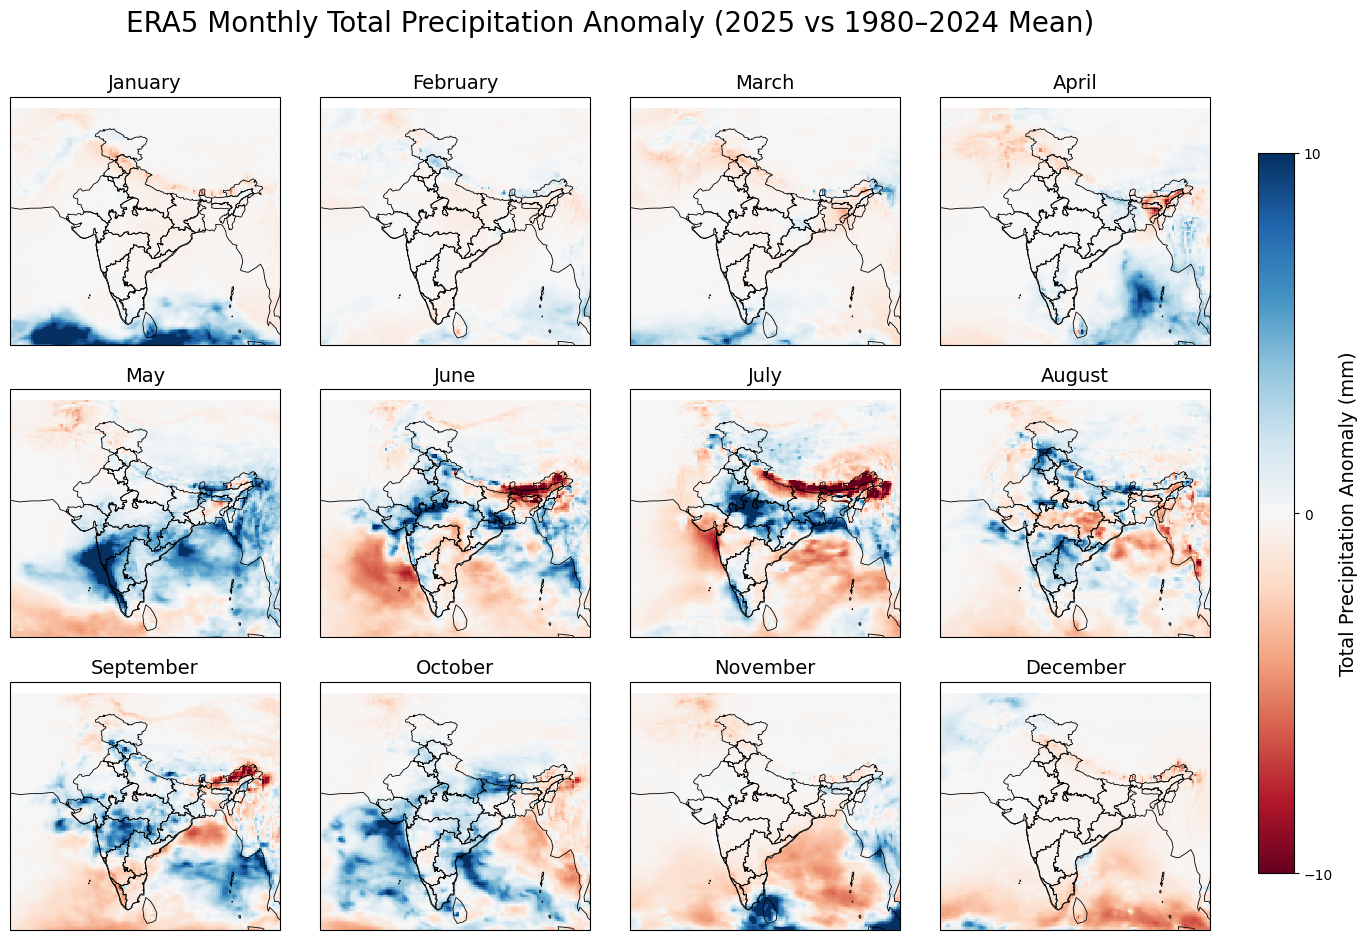

In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import numpy as np
import os
from matplotlib.colors import TwoSlopeNorm

# ----------------------------
# USER CONTROLS
# ----------------------------
clim_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_1980-2024"
yr2025_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_2025"

india_shp = r"/media/nilay/HDD/IIT KGP 2025/PHD/Shapefiles/India Shapefile With Kashmir/India Shape/india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

# --- VARIABLE CONTROL ---
# ERA5 total precipitation is usually "tp" (meters). We'll convert to mm.
precip_var = "tp"

# --- ANOMALY LIMIT CONTROLS (mm) ---
# Set your hard limits here, e.g. -10 to +100 mm as you mentioned.
anom_min = -10
anom_max = 10

# If you want limits to be auto-derived from data, set this True:
AUTO_LIMITS = False

# If AUTO_LIMITS=True, choose method:
# "minmax" uses absolute extremes; "percentile" is robust.
AUTO_METHOD = "minmax"   # or "percentile"
P_LOW, P_HIGH = 2, 98    # used only if AUTO_METHOD="percentile"

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIRST PASS (optional): compute anomaly limits before plotting
# ----------------------------
if AUTO_LIMITS:
    all_vals = []
    global_min = np.inf
    global_max = -np.inf

    for mon in months:
        clim_file = os.path.join(
            clim_dir,
            f"TP_SF_T2M_{mon}_19802024_data_stream-moda_stepType-avgad.nc"
        )
        yr2025_file = os.path.join(
            yr2025_dir,
            f"TP_SF_T2M_{mon}_20252025_data_stream-moda_stepType-avgad.nc"
        )

        if not os.path.exists(clim_file) or not os.path.exists(yr2025_file):
            continue

        ds_clim = xr.open_dataset(clim_file)
        ds_2025 = xr.open_dataset(yr2025_file)

        ds_clim = ds_clim.sel(longitude=slice(lon_min, lon_max),
                              latitude=slice(lat_max, lat_min))
        ds_2025 = ds_2025.sel(longitude=slice(lon_min, lon_max),
                              latitude=slice(lat_max, lat_min))

        clim_time = "valid_time" if "valid_time" in ds_clim.dims else "time"
        yr_time = "valid_time" if "valid_time" in ds_2025.dims else "time"

        # tp is in meters -> convert to mm
        tp_clim = ds_clim[precip_var].mean(clim_time) * 1000.0
        tp_2025 = ds_2025[precip_var].mean(yr_time) * 1000.0

        tp_anom = tp_2025 - tp_clim

        mn = float(tp_anom.min())
        mx = float(tp_anom.max())
        global_min = min(global_min, mn)
        global_max = max(global_max, mx)

        all_vals.append(tp_anom.values.ravel())

    if len(all_vals) == 0:
        raise FileNotFoundError("No matching monthly files found to compute AUTO_LIMITS.")

    all_vals = np.concatenate(all_vals)
    all_vals = all_vals[np.isfinite(all_vals)]

    if AUTO_METHOD.lower() == "percentile":
        lo = np.percentile(all_vals, P_LOW)
        hi = np.percentile(all_vals, P_HIGH)
        # make symmetric about 0 for anomaly visualization
        lim = max(abs(lo), abs(hi))
        anom_min, anom_max = -lim, lim
    else:
        # minmax then symmetric about 0
        lim = max(abs(global_min), abs(global_max))
        anom_min, anom_max = -lim, lim

    print(f"AUTO_LIMITS set -> using anom_min={anom_min:.2f} mm, anom_max={anom_max:.2f} mm")

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(24, 12),
    subplot_kw={"projection": ccrs.PlateCarree()}
)
axes = axes.flatten()
im = None

# Zero-centered normalization so 0 anomaly is the neutral (white) color
norm = TwoSlopeNorm(vmin=anom_min, vcenter=0.0, vmax=anom_max)

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):
    ax = axes[i]

    clim_file = os.path.join(
        clim_dir,
        f"TP_SF_T2M_{mon}_19802024_data_stream-moda_stepType-avgad.nc"
    )
    yr2025_file = os.path.join(
        yr2025_dir,
        f"TP_SF_T2M_{mon}_20252025_data_stream-moda_stepType-avgad.nc"
    )

    if not os.path.exists(clim_file) or not os.path.exists(yr2025_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        ax.set_xticks([])
        ax.set_yticks([])
        continue

    ds_clim = xr.open_dataset(clim_file)
    ds_2025 = xr.open_dataset(yr2025_file)

    ds_clim = ds_clim.sel(longitude=slice(lon_min, lon_max),
                          latitude=slice(lat_max, lat_min))
    ds_2025 = ds_2025.sel(longitude=slice(lon_min, lon_max),
                          latitude=slice(lat_max, lat_min))

    clim_time = "valid_time" if "valid_time" in ds_clim.dims else "time"
    yr_time = "valid_time" if "valid_time" in ds_2025.dims else "time"

    # --- PRECIP (tp) in meters -> mm ---
    tp_clim = ds_clim[precip_var].mean(clim_time) * 1000.0
    tp_2025 = ds_2025[precip_var].mean(yr_time) * 1000.0

    # --- ANOMALY (mm) ---
    tp_anom = tp_2025 - tp_clim

    im = ax.pcolormesh(
        tp_anom.longitude,
        tp_anom.latitude,
        tp_anom,
        #cmap="RdBu_r", 
        cmap="RdBu", 
        norm=norm,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)
    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR
# ----------------------------
if im is not None:
    cax = fig.add_axes([0.92, 0.25, 0.015, 0.6])
    cb = fig.colorbar(im, cax=cax)
    cb.set_label("Total Precipitation Anomaly (mm)", fontsize=14)

    # Ticks control (edit if you want different spacing)
    # Example: from -10 to 100 with 10 mm steps if you set those hard limits.
    step = 10
    cb.set_ticks(np.arange(np.floor(anom_min / step) * step,
                           np.ceil(anom_max / step) * step + step, step))

fig.suptitle(
    "ERA5 Monthly Total Precipitation Anomaly (2025 vs 1980–2024 Mean)",
    fontsize=20, y=0.97, x=0.65
)

plt.subplots_adjust(
    left=0.4, right=0.9,
    top=0.9, bottom=0.2,
    wspace=0.15, hspace=0.15
)

plt.show()


# Snowfall annomally in Ubontu =>

In [11]:
import xarray as xr
import numpy as np
import os

# ----------------------------
# USER CONTROLS
# ----------------------------
clim_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_1980-2024"
yr2025_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_2025"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# --- VARIABLE CONTROL ---
snow_var = "sf"  # ERA5 snowfall (commonly "sf"), usually in meters (water equivalent)

# choose file type: "avgua" for monthly mean, "avgad" for daily-aggregated
step_type = "avgad"   # change to "avgua" if you want the monthly mean product

# ----------------------------
# GLOBAL TRACKERS
# ----------------------------
global_min = np.inf
global_max = -np.inf
any_data = False

print("\nMonthly Snowfall Anomaly Range (mm)\n")

for mon in months:

    clim_file = os.path.join(
        clim_dir,
        f"TP_SF_T2M_{mon}_19802024_data_stream-moda_stepType-{step_type}.nc"
    )

    yr2025_file = os.path.join(
        yr2025_dir,
        f"TP_SF_T2M_{mon}_20252025_data_stream-moda_stepType-{step_type}.nc"
    )

    if not os.path.exists(clim_file) or not os.path.exists(yr2025_file):
        print(f"{mon}: FILE NOT FOUND")
        continue

    ds_clim = xr.open_dataset(clim_file)
    ds_2025 = xr.open_dataset(yr2025_file)

    ds_clim = ds_clim.sel(longitude=slice(lon_min, lon_max),
                          latitude=slice(lat_max, lat_min))
    ds_2025 = ds_2025.sel(longitude=slice(lon_min, lon_max),
                          latitude=slice(lat_max, lat_min))

    clim_time = "valid_time" if "valid_time" in ds_clim.dims else "time"
    yr_time = "valid_time" if "valid_time" in ds_2025.dims else "time"

    # snowfall: meters -> mm
    sf_clim = ds_clim[snow_var].mean(clim_time) * 1000.0
    sf_2025 = ds_2025[snow_var].mean(yr_time) * 1000.0

    sf_anom = sf_2025 - sf_clim

    arr = sf_anom.values
    arr = arr[np.isfinite(arr)]

    if arr.size == 0:
        print(f"{mon:9s} → all values are NaN/inf in this domain")
        continue

    any_data = True
    mon_min = float(arr.min())
    mon_max = float(arr.max())

    global_min = min(global_min, mon_min)
    global_max = max(global_max, mon_max)

    print(f"{mon:9s} → min = {mon_min:8.2f} mm , max = {mon_max:8.2f} mm")

print("\nOverall Anomaly Range (All Months Combined)")
if any_data:
    print(f"Minimum anomaly = {global_min:.2f} mm")
    print(f"Maximum anomaly = {global_max:.2f} mm")
else:
    print("No finite anomaly values were found (check variable name 'sf', domain, or files).")



Monthly Snowfall Anomaly Range (mm)

January   → min =   -11.45 mm , max =     2.34 mm
February  → min =    -2.11 mm , max =     3.98 mm
March     → min =    -3.43 mm , max =     5.76 mm
April     → min =    -4.53 mm , max =     2.16 mm
May       → min =    -3.67 mm , max =     2.95 mm
June      → min =    -3.09 mm , max =     1.55 mm
July      → min =    -3.60 mm , max =     1.46 mm
August    → min =    -2.01 mm , max =     3.42 mm
September → min =    -2.60 mm , max =     2.73 mm
October   → min =    -2.48 mm , max =     5.76 mm
November  → min =    -5.51 mm , max =     0.93 mm
December  → min =    -9.98 mm , max =     4.80 mm

Overall Anomaly Range (All Months Combined)
Minimum anomaly = -11.45 mm
Maximum anomaly = 5.76 mm


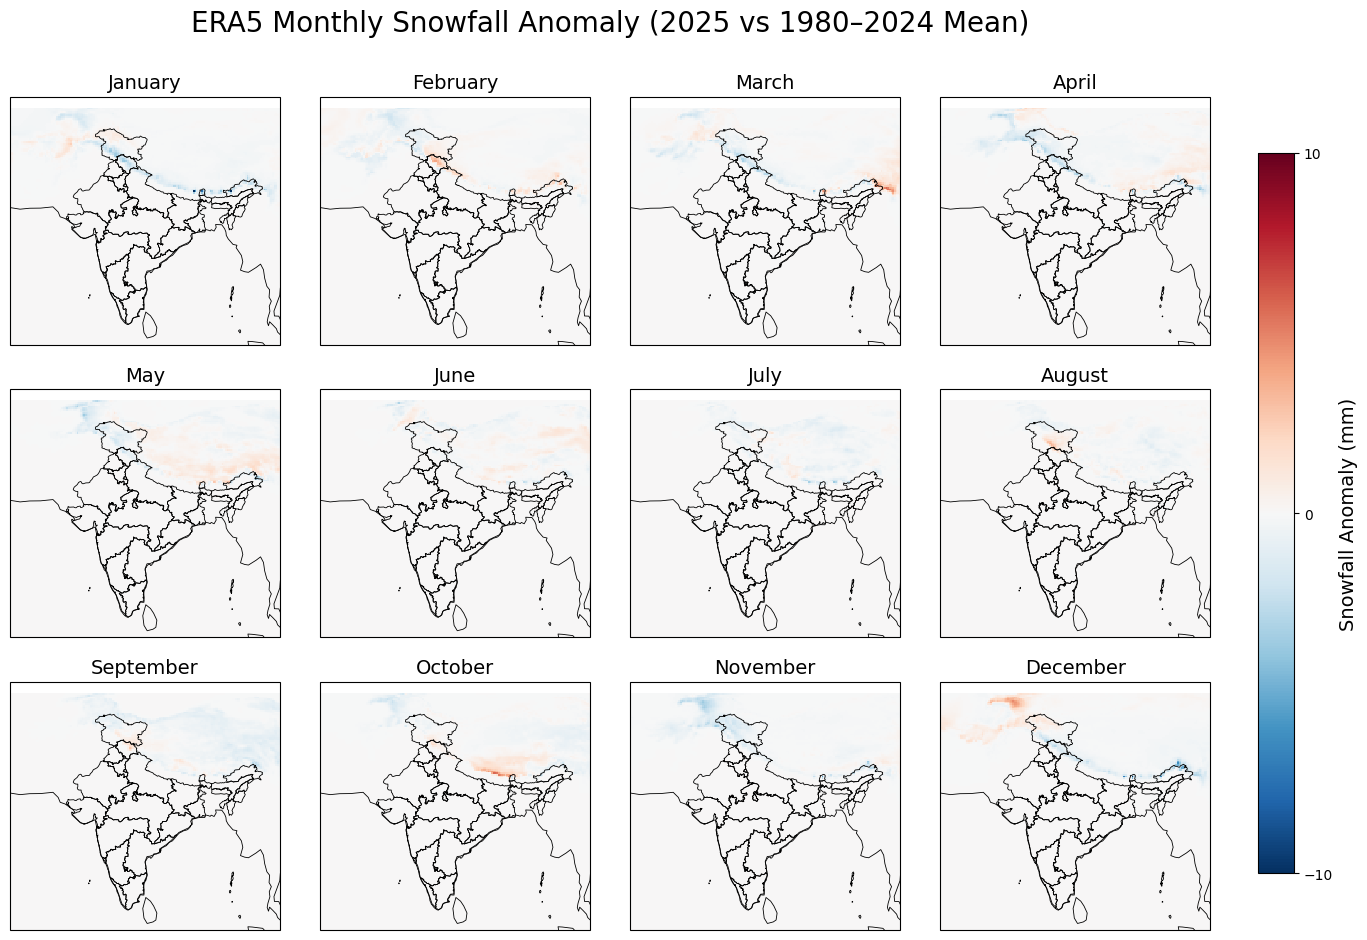

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import numpy as np
import os
from matplotlib.colors import TwoSlopeNorm

# ----------------------------
# USER CONTROLS
# ----------------------------
clim_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_1980-2024"
yr2025_dir = r"/media/nilay/HDD/IIT KGP 2025/PHD/ERA5_Downloads/TP_SF_T2M_2025"

india_shp = r"/media/nilay/HDD/IIT KGP 2025/PHD/Shapefiles/India Shapefile With Kashmir/India Shape/india_st.shp"

lon_min, lon_max = 60, 100
lat_min, lat_max = 5, 40

# --- VARIABLE CONTROL ---
snow_var = "sf"  # ERA5 snowfall variable (commonly "sf"), meters -> mm

# choose file type: "avgua" for monthly mean, "avgad" for daily-aggregated
step_type = "avgad"   # change to "avgua" if you want monthly mean product

# --- HARD ANOMALY LIMIT CONTROLS (mm) ---
# Set based on your printed min/max (e.g., symmetric limits)
anom_min = -10
anom_max = 10

# --- Colormap control ---
# "RdBu_r" => positive red, negative blue
# "RdBu"   => positive blue, negative red
cmap_choice = "RdBu_r"

months = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

# ----------------------------
# SHAPEFILE
# ----------------------------
reader = shpreader.Reader(india_shp)
india_geom = list(reader.geometries())

# ----------------------------
# FIGURE
# ----------------------------
fig, axes = plt.subplots(
    3, 4, figsize=(24, 12),
    subplot_kw={"projection": ccrs.PlateCarree()}
)
axes = axes.flatten()

im = None

# zero-centered normalization (white at 0)
norm = TwoSlopeNorm(vmin=anom_min, vcenter=0.0, vmax=anom_max)

# ----------------------------
# LOOP OVER MONTHS
# ----------------------------
for i, mon in enumerate(months):
    ax = axes[i]

    clim_file = os.path.join(
        clim_dir,
        f"TP_SF_T2M_{mon}_19802024_data_stream-moda_stepType-{step_type}.nc"
    )
    yr2025_file = os.path.join(
        yr2025_dir,
        f"TP_SF_T2M_{mon}_20252025_data_stream-moda_stepType-{step_type}.nc"
    )

    if not os.path.exists(clim_file) or not os.path.exists(yr2025_file):
        ax.text(0.5, 0.5, "FILE NOT FOUND",
                transform=ax.transAxes,
                ha="center", va="center", color="red")
        ax.set_xticks([])
        ax.set_yticks([])
        continue

    ds_clim = xr.open_dataset(clim_file)
    ds_2025 = xr.open_dataset(yr2025_file)

    ds_clim = ds_clim.sel(longitude=slice(lon_min, lon_max),
                          latitude=slice(lat_max, lat_min))
    ds_2025 = ds_2025.sel(longitude=slice(lon_min, lon_max),
                          latitude=slice(lat_max, lat_min))

    clim_time = "valid_time" if "valid_time" in ds_clim.dims else "time"
    yr_time = "valid_time" if "valid_time" in ds_2025.dims else "time"

    # snowfall: meters -> mm
    sf_clim = ds_clim[snow_var].mean(clim_time) * 1000.0
    sf_2025 = ds_2025[snow_var].mean(yr_time) * 1000.0

    sf_anom = sf_2025 - sf_clim

    im = ax.pcolormesh(
        sf_anom.longitude,
        sf_anom.latitude,
        sf_anom,
        cmap=cmap_choice,
        norm=norm,
        shading="auto",
        transform=ccrs.PlateCarree()
    )

    ax.coastlines(resolution="110m", linewidth=0.6)
    ax.add_geometries(
        india_geom,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="black",
        linewidth=0.6
    )

    ax.set_extent([lon_min, lon_max, lat_min, lat_max])
    ax.set_title(mon, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

# ----------------------------
# COLORBAR
# ----------------------------
if im is not None:
    cax = fig.add_axes([0.92, 0.25, 0.015, 0.6])
    cb = fig.colorbar(im, cax=cax)
    cb.set_label("Snowfall Anomaly (mm)", fontsize=14)

    # ticks control
    step = 10  # change if you want coarser/finer ticks
    cb.set_ticks(np.arange(anom_min, anom_max + step, step))

fig.suptitle(
    "ERA5 Monthly Snowfall Anomaly (2025 vs 1980–2024 Mean)",
    fontsize=20, y=0.97, x=0.65
)

plt.subplots_adjust(
    left=0.4, right=0.9,
    top=0.9, bottom=0.2,
    wspace=0.15, hspace=0.15
)

plt.show()
